# Interferência Quântica e Algoritmos

## 📖 Visão Geral

Bem-vindo ao notebook mais avançado desta série! Aqui vamos mergulhar nos mecanismos que tornam os **algoritmos quânticos** fundamentalmente diferentes (e mais poderosos) que os clássicos.

### 🎯 O Que Você Vai Aprender

1. **Phase Kickback (Coice de Fase)**
   - O mecanismo "secreto" dos algoritmos quânticos
   - Como o qubit alvo pode afetar o qubit de controle
   - Demonstração prática com visualizações

2. **Algoritmo de Deutsch-Jozsa**
   - Primeiro algoritmo a demonstrar vantagem quântica
   - Resolve um problema com UMA consulta (vs. exponencialmente muitas)
   - Implementação completa do zero

### 📚 Pré-requisitos

Antes de continuar, certifique-se de que você entende:

- ✅ **Superposição** - de [01-intro.ipynb](01-intro.ipynb)
- ✅ **Emaranhamento** - de [02-teletransport.ipynb](02-teletransport.ipynb)
- ✅ **Porta Hadamard** - de [04-Hadamard-experiment.ipynb](04-Hadamard-experiment.ipynb)
- ✅ **Interferência básica** - H × H = I

### 🎓 Nível de Dificuldade

**Intermediário a Avançado** - Este notebook assume familiaridade com:
- Notação de Dirac ($|0\rangle, |1\rangle, |+\rangle, |-\rangle$)
- Portas quânticas básicas (H, X, CNOT)
- Conceito de fase em estados quânticos
- Produto tensorial ($\otimes$)

### 💡 Por Que Este Conteúdo é Importante?

**Phase Kickback** é o "ingrediente secreto" que faz algoritmos como:
- 🔍 **Grover** (busca quântica) - quadraticamente mais rápido
- 🔢 **Shor** (fatoração) - exponencialmente mais rápido (quebra RSA!)
- ⚗️ **QPE** (estimação de fase) - base da química quântica

Sem entender kickback, algoritmos quânticos parecem "mágica". Com esse entendimento, você verá a lógica elegante por trás da supremacia quântica.

### 🗺️ Estrutura do Notebook

```text
1. Phase Kickback
   ├── Conceito e Analogia
   ├── Matemática Detalhada
   ├── Demonstração Prática
   └── Visualizações (Bloch + Q-Sphere)

2. Deutsch-Jozsa
   ├── Definição do Problema
   ├── Oráculos (Constante vs. Balanceado)
   ├── Implementação Completa
   └── Análise de Resultados

3. Resumo e Próximos Passos
   └── Conexões com Algoritmos Avançados
```

---

**Dica:** Execute as células em ordem sequencial. Cada visualização ajuda a construir a intuição para o próximo conceito!

---

## Phase Kickback e o Algoritmo de Deutsch-Jozsa

Vamos mergulhar no mecanismo que faz os algoritmos quânticos funcionarem.

Até agora, a intuição foi: "O qubit de controle manda no qubit alvo".

Lembra da porta CNOT em [01-intro.ipynb](01-intro.ipynb)?

No **Phase Kickback** (Coice de Fase), descobrimos que a relação é uma via de mão dupla. O qubit alvo pode alterar o estado do qubit de controle.

É aqui que a "mágica" acontece.

---



### 1. O Conceito: Phase Kickback (O Recuo da Arma)

Imagine que você está disparando uma arma de fogo:

1. **Ação:** Você (Controle) aperta o gatilho.
2. **Efeito:** A bala (Alvo) sai.
3. **Reação:** O seu ombro sente um "coice" ou recuo para trás.

Na computação quântica, se prepararmos o qubit alvo de uma maneira específica, a operação "bate" nele e volta, alterando a fase do controle.



#### A Matemática (Simplificada)

Vamos usar a porta CNOT.

- Alvo Normal ($|0\rangle$ ou $|1\rangle$): O CNOT inverte o valor (0 vira 1).
- Alvo em Autestado ($|-\rangle$): O estado $|-\rangle$ (que é $H|1\rangle$) é especial para a porta X (NOT).

$$X|-\rangle = -|-\rangle$$

(A porta X apenas adiciona um sinal negativo, uma fase de 180º).


---

##### Mais sobre o estado $|-\rangle$

O estado $|-\rangle$ é um dos **estados de superposição fundamentais** em computação quântica. Vou explicar:

**O que é $|-\rangle$?**

$$|-\rangle = \frac{|0\rangle - |1\rangle}{\sqrt{2}}$$

É uma **superposição** de $|0\rangle$ e $|1\rangle$ com uma diferença de fase de 180° entre eles (note o sinal **negativo**).

**Por que $|-\rangle = H|1\rangle$?**

Aplicando a porta Hadamard (H) ao estado $|1\rangle$:

$$H|1\rangle = H \begin{pmatrix} 0 \\ 1 \end{pmatrix} = \frac{1}{\sqrt{2}} \begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix} \begin{pmatrix} 0 \\ 1 \end{pmatrix}$$

$$= \frac{1}{\sqrt{2}} \begin{pmatrix} 1 \\ -1 \end{pmatrix} = \frac{|0\rangle - |1\rangle}{\sqrt{2}} = |-\rangle$$

##### Comparação com $|+\rangle$

- $|+\rangle = H|0\rangle = \frac{|0\rangle + |1\rangle}{\sqrt{2}}$ (sinal **positivo**)
- $|-\rangle = H|1\rangle = \frac{|0\rangle - |1\rangle}{\sqrt{2}}$ (sinal **negativo**)

---

##### Por que $|-\rangle$ é especial para o Phase Kickback?

O estado $|-\rangle$ é um **autoestado** da porta X (NOT):

$$X|-\rangle = -|-\rangle$$

A porta X apenas adiciona uma fase global negativa, mas não muda o estado. Essa propriedade permite que a fase "retorne" para o qubit de controle no CNOT, criando o efeito de **Phase Kickback**.

Quando aplicamos CNOT com o alvo em $|-\rangle$:

- Se o controle for $|0\rangle$, nada acontece.
- Se o controle for $|1\rangle$, o alvo ganha um sinal de menos ($-$).
- Como o alvo não mudou visualmente (continua $|-\rangle$), esse sinal de menos migra para o qubit de controle.
  
Resultado: O controle, que era $|+\rangle$, vira $|-\rangle$. O alvo não muda.


#### Código completo do Phase Kickback

Segue o código completo para demonstrar o Phase Kickback usando Qiskit. Logo após, faremos uma análise detalhada de cada etapa.

In [30]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector, plot_state_qsphere

In [31]:
# Criar circuito com 2 qubits
qc = QuantumCircuit(2, 1)  # 2 Qubits, 1 Bit clássico
qc.draw("mpl")

# 1. PREPARAÇÃO
# Colocar o Qubit 0 (Controle) em Superposição |+>
qc.h(0)

# Colocar o Qubit 1 (Alvo) no estado |- >
# Para isso: aplicamos X (vira 1) e depois H (vira menos)
qc.x(1)
qc.h(1)

# 2. O KICKBACK
# Aplicamos CNOT. O alvo (q1) está em |->.
# Isso deve fazer o q0 virar |-> "por tabela".
qc.cx(0, 1)

# 3. VERIFICAÇÃO
# Como saber se q0 virou |->?
# Se aplicarmos H novamente:
# H em |+> volta para 0
# H em |-> volta para 1
qc.h(0)

# Medimos APENAS o qubit de controle (q0)
qc.measure(0, 0)

# Executar
simulador = AerSimulator()
job = simulador.run(transpile(qc, simulador), shots=1000)
print("Resultado do Controle:", job.result().get_counts())

Resultado do Controle: {'1': 1000}


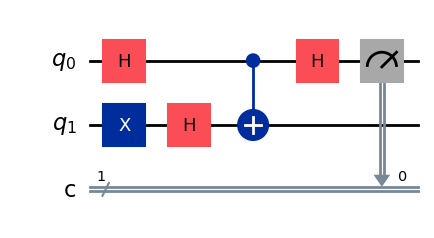

In [32]:
# Visualizar o circuito completo
qc.draw('mpl')


#### Demonstração detalhada de Phase Kickback

Vamos provar que o qubit de controle muda sem que nenhuma porta toque nele diretamente.


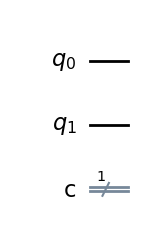

In [33]:

# Criar circuito com 2 qubits
qc = QuantumCircuit(2, 1) # 2 Qubits, 1 Bit clássico

# Desenhar o circuito
qc.draw('mpl')


Matematicamente, os estados dos qubits, quando criados, são:

- Qubit 0 (Controle): $|0\rangle$
- Qubit 1 (Alvo): $|0\rangle$

Estes estados iniciais representam $|00\rangle$ do registrador quântico.


### O Estado Inicial

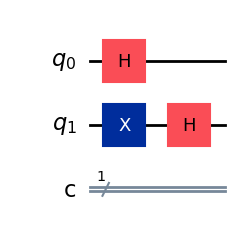

In [34]:

# 1. PREPARAÇÃO
# Colocar o Qubit 0 (Controle) em Superposição |+>
qc.h(0)


# Colocar o Qubit 1 (Alvo) no estado |- > 
# Para isso: aplicamos X (vira 1) e depois H (vira menos)
qc.x(1)
qc.h(1)

# Desenhar o circuito
qc.draw('mpl')

#### Demonstração Matemática: Preparação do Estado Inicial

O estado inicial preparado após a aplicação das portas Hadamard é:

$$|\psi_0\rangle = |+\rangle \otimes |-\rangle$$

Expandindo cada componente:

$$|+\rangle = \frac{|0\rangle + |1\rangle}{\sqrt{2}}$$

$$|-\rangle = \frac{|0\rangle - |1\rangle}{\sqrt{2}}$$

Portanto, o estado completo é:

$$|\psi_0\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle) \otimes \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle)$$

Usando a representação matricial dos estados:

$$|0\rangle = \begin{pmatrix} 1 \\ 0 \end{pmatrix}, \quad |1\rangle = \begin{pmatrix} 0 \\ 1 \end{pmatrix}$$

$$|+\rangle = \frac{1}{\sqrt{2}}\begin{pmatrix} 1 \\ 1 \end{pmatrix}, \quad |-\rangle = \frac{1}{\sqrt{2}}\begin{pmatrix} 1 \\ -1 \end{pmatrix}$$

O produto tensorial $|\psi_0\rangle = |+\rangle \otimes |-\rangle$ é calculado como:
$$|\psi_0\rangle = \frac{1}{\sqrt{2}}\begin{pmatrix} 1 \\ 1 \end{pmatrix} \otimes \frac{1}{\sqrt{2}}\begin{pmatrix} 1 \\ -1 \end{pmatrix}$$

Primeiro, combinamos os coeficientes escalares:

$$= \frac{1}{\sqrt{2}} \cdot \frac{1}{\sqrt{2}} \begin{pmatrix} 1 \\ 1 \end{pmatrix} \otimes \begin{pmatrix} 1 \\ -1 \end{pmatrix} = \frac{1}{2}\begin{pmatrix} 1 \\ 1 \end{pmatrix} \otimes \begin{pmatrix} 1 \\ -1 \end{pmatrix}$$

Agora aplicamos a definição do produto tensorial (produto de Kronecker). Para dois vetores $\mathbf{u} = \begin{pmatrix} u_1 \\ u_2 \end{pmatrix}$ e $\mathbf{v} = \begin{pmatrix} v_1 \\ v_2 \end{pmatrix}$:

$$\mathbf{u} \otimes \mathbf{v} = \begin{pmatrix} u_1 \mathbf{v} \\ u_2 \mathbf{v} \end{pmatrix} = \begin{pmatrix} u_1 v_1 \\ u_1 v_2 \\ u_2 v_1 \\ u_2 v_2 \end{pmatrix}$$

Aplicando ao nosso caso onde $u_1 = 1$, $u_2 = 1$, $v_1 = 1$, $v_2 = -1$:

$$\begin{pmatrix} 1 \\ 1 \end{pmatrix} \otimes \begin{pmatrix} 1 \\ -1 \end{pmatrix} = \begin{pmatrix} 1 \cdot \begin{pmatrix} 1 \\ -1 \end{pmatrix} \\ 1 \cdot \begin{pmatrix} 1 \\ -1 \end{pmatrix} \end{pmatrix} = \begin{pmatrix} 1 \cdot 1 \\ 1 \cdot (-1) \\ 1 \cdot 1 \\ 1 \cdot (-1) \end{pmatrix} = \begin{pmatrix} 1 \\ -1 \\ 1 \\ -1 \end{pmatrix}$$

Multiplicando pelo coeficiente $\frac{1}{2}$:
$$|\psi_0\rangle = \frac{1}{2}\begin{pmatrix} 1 \\ 1 \end{pmatrix} \otimes \begin{pmatrix} 1 \\ -1 \end{pmatrix}$$

Se você ainda não entendeu, vamos calcular o produto tensorial passo a passo. O produto tensorial de dois vetores coluna funciona da seguinte forma:

**Passo 1:** Pegue o primeiro elemento do primeiro vetor (que é $1$) e multiplique-o por todo o segundo vetor:

$$1 \cdot \begin{pmatrix} 1 \\ -1 \end{pmatrix} = \begin{pmatrix} 1 \cdot 1 \\ 1 \cdot (-1) \end{pmatrix} = \begin{pmatrix} 1 \\ -1 \end{pmatrix}$$

**Passo 2:** Pegue o segundo elemento do primeiro vetor (que também é $1$) e multiplique-o por todo o segundo vetor:

$$1 \cdot \begin{pmatrix} 1 \\ -1 \end{pmatrix} = \begin{pmatrix} 1 \cdot 1 \\ 1 \cdot (-1) \end{pmatrix} = \begin{pmatrix} 1 \\ -1 \end{pmatrix}$$

**Passo 3:** Empilhe os resultados verticalmente para formar um vetor de 4 elementos:

$$\begin{pmatrix} 1 \\ 1 \end{pmatrix} \otimes \begin{pmatrix} 1 \\ -1 \end{pmatrix} = \begin{pmatrix} \text{resultado do passo 1} \\ \text{resultado do passo 2} \end{pmatrix} = \begin{pmatrix} 1 \\ -1 \\ 1 \\ -1 \end{pmatrix}$$

**Passo 4:** Multiplique o resultado pelo coeficiente $\frac{1}{2}$:

$$|\psi_0\rangle = \frac{1}{2}\begin{pmatrix} 1 \\ -1 \\ 1 \\ -1 \end{pmatrix} = \begin{pmatrix} \frac{1}{2} \cdot 1 \\ \frac{1}{2} \cdot (-1) \\ \frac{1}{2} \cdot 1 \\ \frac{1}{2} \cdot (-1) \end{pmatrix} = \begin{pmatrix} \frac{1}{2} \\ -\frac{1}{2} \\ \frac{1}{2} \\ -\frac{1}{2} \end{pmatrix}$$

Lembre-se que se expandirmos em termos da base computacional $\{|00\rangle, |01\rangle, |10\rangle, |11\rangle\}$:

$$|00\rangle = \begin{pmatrix} 1 \\ 0 \\ 0 \\ 0 \end{pmatrix}, \quad |01\rangle = \begin{pmatrix} 0 \\ 1 \\ 0 \\ 0 \end{pmatrix}, \quad |10\rangle = \begin{pmatrix} 0 \\ 0 \\ 1 \\ 0 \end{pmatrix}, \quad |11\rangle = \begin{pmatrix} 0 \\ 0 \\ 0 \\ 1 \end{pmatrix}$$

Lembra disso acima? Se não, volte para a seção de produto tensorial em [00-math.ipynb](00-math.ipynb).

Portanto, o vetor $\frac{1}{2}\begin{pmatrix} 1 \\ -1 \\ 1 \\ -1 \end{pmatrix}$ pode ser escrito como:

$$|\psi_0\rangle = \frac{1}{2} \cdot 1 \cdot \begin{pmatrix} 1 \\ 0 \\ 0 \\ 0 \end{pmatrix} + \frac{1}{2} \cdot (-1) \cdot \begin{pmatrix} 0 \\ 1 \\ 0 \\ 0 \end{pmatrix} + \frac{1}{2} \cdot 1 \cdot \begin{pmatrix} 0 \\ 0 \\ 1 \\ 0 \end{pmatrix} + \frac{1}{2} \cdot (-1) \cdot \begin{pmatrix} 0 \\ 0 \\ 0 \\ 1 \end{pmatrix} \implies$$


$$|\psi_0\rangle = \frac{1}{2} \cdot 1 \cdot |00\rangle + \frac{1}{2} \cdot (-1) \cdot |01\rangle + \frac{1}{2} \cdot 1 \cdot |10\rangle + \frac{1}{2} \cdot (-1) \cdot |11\rangle$$

Este vetor corresponde ao estado na base computacional:

$$= \frac{1}{2}(|00\rangle - |01\rangle + |10\rangle - |11\rangle)$$

Percebeu como é simples? Provavelmente a notação matemática é assustadora, mas o conceito é simples quando você vê a operação em ação na ponta do lápis.

### Visualização: Estado Inicial Preparado

Estado inicial: Statevector([ 0.5+0.j,  0.5+0.j, -0.5+0.j, -0.5+0.j],
            dims=(2, 2))


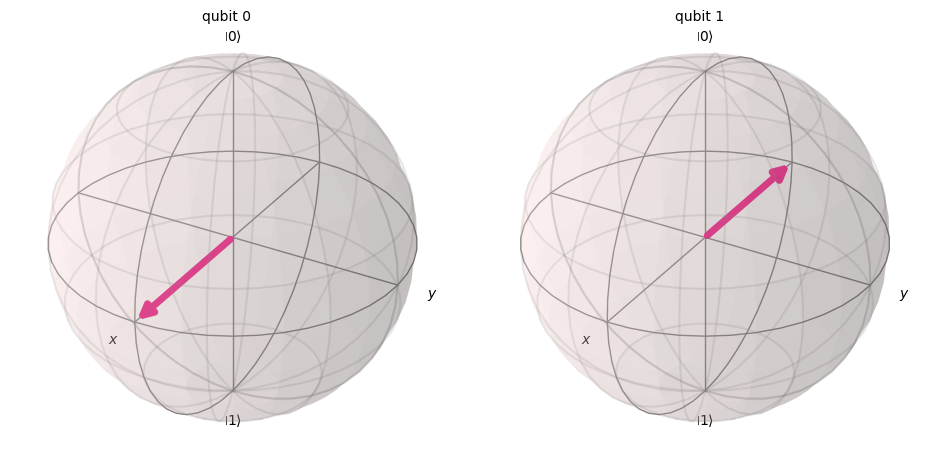

In [35]:
# Visualizar o estado após preparação
estado_inicial = Statevector(qc)
print(f"Estado inicial: {estado_inicial}")
display(plot_bloch_multivector(estado_inicial))


A esfera acima representa $|\psi_0\rangle = |+\rangle \otimes |-\rangle$.

#### O que é a Esfera de Bloch?

(Relembrando)

A **Esfera de Bloch** é uma representação geométrica tridimensional do estado de um único qubit. Ela é uma ferramenta visual poderosa para entender os estados quânticos e suas transformações.

**Características principais:**

1. **Polos da esfera:**
   - **Polo Norte (topo):** Representa o estado $|0\rangle$
   - **Polo Sul (base):** Representa o estado $|1\rangle$

2. **Equador da esfera:**
   - Contém todos os estados de superposição com fase relativa
   - O ponto no eixo X positivo representa $H|0\rangle = |+ \rangle = \frac{|0\rangle + |1\rangle}{\sqrt{2}}$
   - O ponto no eixo X negativo representa $H|1\rangle = |-\rangle = \frac{|0\rangle - |1\rangle}{\sqrt{2}}$

3. **Interior da esfera:**
   - Apenas a superfície é válida para estados quânticos puros
   - Pontos no interior representam estados mistos (não se aplicam aqui)

4. **Vetores (setas rosa):**
   - Mostram o estado atual de cada qubit
   - A direção do vetor indica a combinação de amplitude e fase
   - Quanto mais próximo de um polo, maior a probabilidade de medir aquele estado

**Por que dois qubits = duas esferas?**

Cada qubit individual pode ser visualizado em sua própria esfera de Bloch. Quando temos 2 qubits:
- **Qubit 0 (esquerda):** Mostra o estado do qubit de controle
- **Qubit 1 (direita):** Mostra o estado do qubit alvo

**Interpretando o estado preparado ($|+\rangle \otimes |-\rangle$):**

- **Qubit 0:** O vetor aponta para o eixo X positivo → está em $|+\rangle$
  - Superposição igual entre $|0\rangle$ e $|1\rangle$ com fase positiva
  - Probabilidades: 50% de medir 0, 50% de medir 1

- **Qubit 1:** O vetor aponta para o eixo X negativo → está em $|-\rangle$
  - Superposição igual entre $|0\rangle$ e $|1\rangle$ com fase negativa
  - Probabilidades: 50% de medir 0, 50% de medir 1
  - O sinal negativo é uma diferença de fase de 180° entre os componentes

**O que observar nas visualizações:**

Quando aplicarmos o CNOT (Phase Kickback), veremos:
- **Qubit 0:** O vetor vai **girar** do eixo X+ para o eixo X- (de $|+\rangle$ para $|-\rangle$)
- **Qubit 1:** O vetor **permanece no mesmo lugar** (continua em $|-\rangle$)

Essa rotação do qubit de controle **sem que nenhuma porta aja diretamente sobre ele** é a essência do Phase Kickback!

## Q-Sphere


Q-Sphere mostrando ambos os qubits:


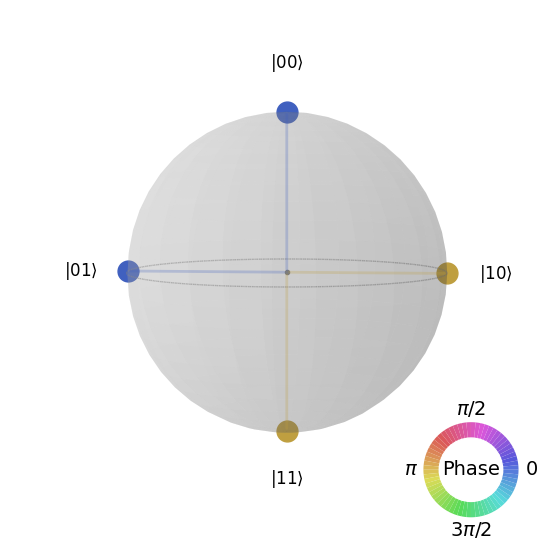

In [36]:

print("\nQ-Sphere mostrando ambos os qubits:")
display(plot_state_qsphere(estado_inicial))

#### O que é a Q-Sphere (Esfera Quântica)?

A **Q-Sphere** é outra visualização poderosa para sistemas quânticos, especialmente útil para visualizar múltiplos qubits simultaneamente. Diferente da Esfera de Bloch que mostra qubits individuais, a Q-Sphere mostra o **estado completo do sistema**.

**Características principais:**

1. **Estrutura da esfera:**
   - Cada **ponto na superfície** representa um possível estado da base computacional
   - Para 2 qubits: 4 pontos (|00⟩, |01⟩, |10⟩, |11⟩)
   - Para 3 qubits: 8 pontos (|000⟩, |001⟩, |010⟩, |011⟩, |100⟩, |101⟩, |110⟩, |111⟩)

2. **Tamanho das esferas (círculos):**
   - O **diâmetro de cada círculo** representa a **amplitude** (probabilidade) daquele estado
   - Círculos maiores = maior probabilidade de medir aquele estado
   - Círculos menores = menor probabilidade
   - Sem círculo = amplitude zero (não contribui para o estado)

3. **Cores dos círculos:**
   - Representam a **fase** do estado quântico
   - **Rosa/Magenta**: Fase positiva (0°)
   - **Verde/Ciano**: Fase negativa (180°) ou outras fases intermediárias
   - A cor indica a fase relativa entre os diferentes componentes do estado

4. **Posição na esfera:**
   - A distribuição dos pontos na superfície segue uma convenção geométrica
   - Estados relacionados ficam próximos na esfera

**Interpretando o estado $|+\rangle \otimes |-\rangle$:**

Expandindo matematicamente:
$$|+\rangle \otimes |-\rangle = \frac{1}{2}(|00\rangle - |01\rangle + |10\rangle - |11\rangle)$$

Na Q-Sphere, veremos **4 círculos** de tamanhos iguais:
- **|00⟩**: Amplitude $\frac{1}{2}$, fase positiva (+) → círculo rosa
- **|01⟩**: Amplitude $\frac{1}{2}$, fase negativa (-) → círculo verde/ciano
- **|10⟩**: Amplitude $\frac{1}{2}$, fase positiva (+) → círculo rosa
- **|11⟩**: Amplitude $\frac{1}{2}$, fase negativa (-) → círculo verde/ciano

Todos os círculos têm o **mesmo tamanho** porque $|\frac{1}{2}|^2 = \frac{1}{4}$ (cada estado tem 25% de probabilidade de ser medido).

As **cores alternadas** mostram o padrão de fase: positivo para |00⟩ e |10⟩, negativo para |01⟩ e |11⟩.

**Q-Sphere vs Esfera de Bloch:**

| Q-Sphere | Esfera de Bloch |
|----------|----------------|
| Mostra o sistema completo (todos os qubits juntos) | Mostra cada qubit individualmente |
| Revela correlações e emaranhamento | Limitada a 1 qubit por esfera |
| Exibe todas as amplitudes e fases simultaneamente | Mostra apenas o estado reduzido de um qubit |
| Ideal para ver interferência quântica | Ideal para visualizar transformações de um único qubit |

**O que observar nas visualizações:**

Quando aplicarmos o CNOT (Phase Kickback), na Q-Sphere veremos:
- Os **tamanhos dos círculos permanecerão os mesmos** (probabilidades não mudam)
- As **cores mudarão** em alguns estados (as fases serão alteradas)
- Especificamente, veremos uma reorganização do padrão de cores mostrando que a fase do sistema mudou

Essa mudança de fase sem alterar probabilidades é a assinatura característica do **Phase Kickback**!

In [37]:
# 🌐 Visualização INTERATIVA da Q-Sphere
# Importar a função do módulo quantum_viz (localizado em ../src)
import sys
import os
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '..', 'src')))
from quantum_viz import plot_qsphere_interactive

# 🎨 Criar e exibir a visualização
print("\n🌐 Q-Sphere INTERATIVA:")
print("   → Magenta = Fase positiva (+)")
print("   → Ciano = Fase negativa (-)")
print("   → Tamanho = Probabilidade\n")

# A função plot_qsphere_interactive salva automaticamente e abre no navegador
fig = plot_qsphere_interactive(estado_inicial)


🌐 Q-Sphere INTERATIVA:
   → Magenta = Fase positiva (+)
   → Ciano = Fase negativa (-)
   → Tamanho = Probabilidade

✅ Visualização 3D salva em: e:\temp\quantum\notebooks\qsphere_interativa.html
   Abrindo no navegador...

💡 Dica: Você pode arrastar, girar e dar zoom na esfera!
   O arquivo HTML pode ser aberto a qualquer momento.


In [38]:

# 2. O KICKBACK
# Aplicamos CNOT. O alvo (q1) está em |->.
# Isso deve fazer o q0 virar |-> "por tabela".
qc.cx(0, 1)


#### Demonstração Matemática: O Phase Kickback

Aplicando CNOT ao estado $|\psi_0\rangle$:

A porta CNOT age como: $\text{CNOT}|c,t\rangle = |c, c \oplus t\rangle$

Mas quando o alvo está em $|-\rangle$, temos uma propriedade especial:

$$\text{CNOT}|c\rangle \otimes |-\rangle = (-1)^c |c\rangle \otimes |-\rangle$$

Aplicando ao nosso estado:

$$|\psi_1\rangle = \text{CNOT}|\psi_0\rangle = \text{CNOT}\left[\frac{1}{\sqrt{2}}(|0\rangle + |1\rangle) \otimes |-\rangle\right]$$

$$= \frac{1}{\sqrt{2}}[\text{CNOT}(|0\rangle \otimes |-\rangle) + \text{CNOT}(|1\rangle \otimes |-\rangle)]$$

$$= \frac{1}{\sqrt{2}}[|0\rangle \otimes |-\rangle + (-1)|1\rangle \otimes |-\rangle]$$

$$= \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle) \otimes |-\rangle = |-\rangle \otimes |-\rangle$$

**Conclusão:** O qubit de controle mudou de $|+\rangle$ para $|-\rangle$ sem que nenhuma porta tenha agido diretamente sobre ele!

Estado após CNOT: Statevector([ 0.5+0.j, -0.5+0.j, -0.5+0.j,  0.5+0.j],
            dims=(2, 2))

Esfera de Bloch - Note a mudança de fase no qubit 0:


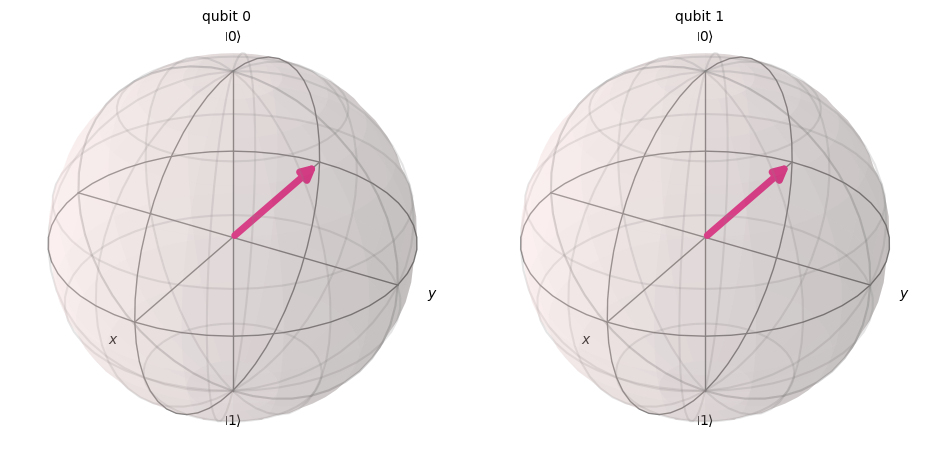


Q-Sphere:


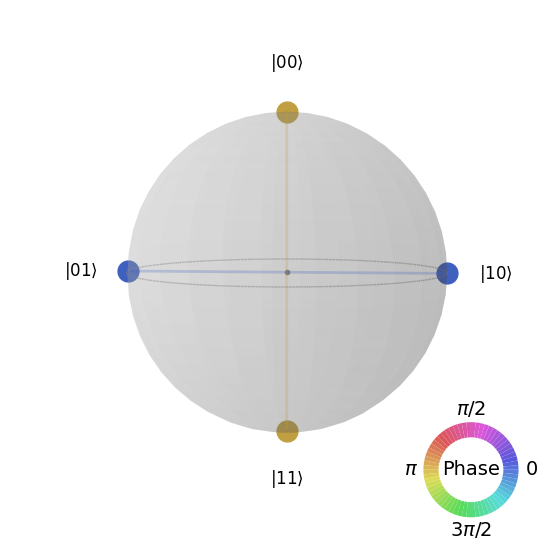

In [39]:
# Visualizar após o CNOT (Phase Kickback aconteceu)
estado_apos_kickback = Statevector(qc)
print(f"Estado após CNOT: {estado_apos_kickback}")
print("\nEsfera de Bloch - Note a mudança de fase no qubit 0:")
display(plot_bloch_multivector(estado_apos_kickback))
print("\nQ-Sphere:")
display(plot_state_qsphere(estado_apos_kickback))

#### Visualização: Após o Phase Kickback (CNOT)

In [40]:

# 3. VERIFICAÇÃO
# Como saber se q0 virou |->?
# Se aplicarmos H novamente:
# H em |+> volta para 0
# H em |-> volta para 1
qc.h(0)


#### Demonstração Matemática: Verificação com Hadamard

Para verificar que o qubit 0 está em $|-\rangle$, aplicamos H novamente:

$$H|+\rangle = H \cdot H|0\rangle = |0\rangle$$

$$H|-\rangle = H \cdot H|1\rangle = |1\rangle$$

Portanto:
- Se medirmos **0**, o estado antes era $|+\rangle$
- Se medirmos **1**, o estado antes era $|-\rangle$

Como o Phase Kickback transformou $|+\rangle \to |-\rangle$, esperamos medir **1** em 100% das vezes!

Estado após verificação (H no q0): Statevector([ 2.29934717e-17+0.j,  7.07106781e-01+0.j, -2.29934717e-17+0.j,
             -7.07106781e-01+0.j],
            dims=(2, 2))


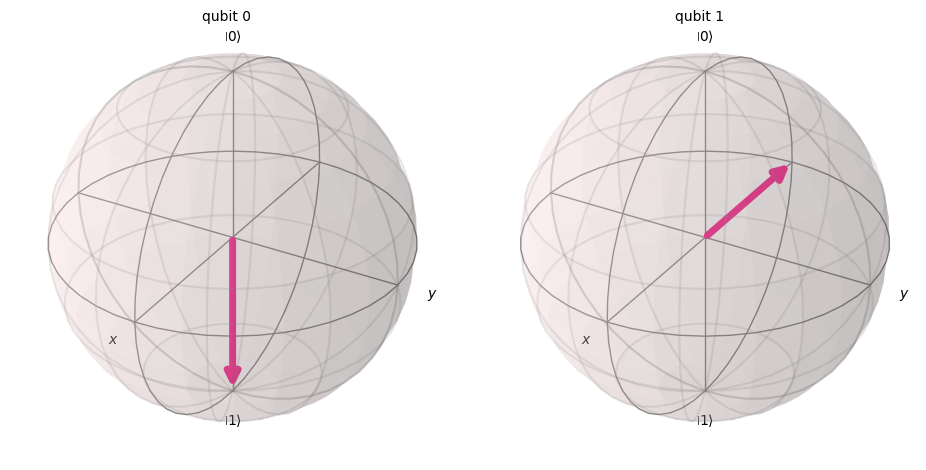


Q-Sphere:


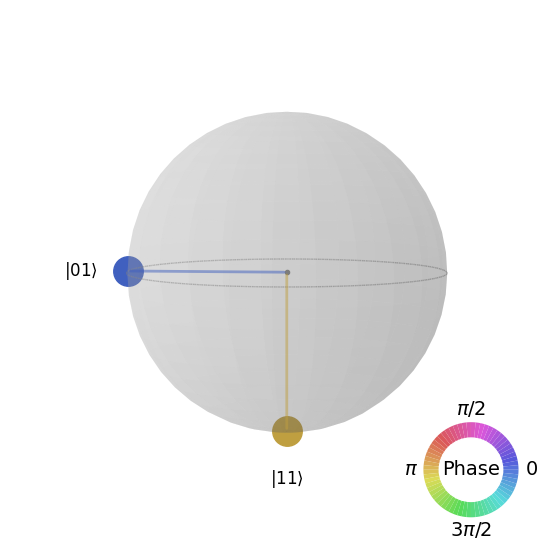

In [41]:
estado_verificacao = Statevector(qc)
print(f"Estado após verificação (H no q0): {estado_verificacao}")
display(plot_bloch_multivector(estado_verificacao))
print("\nQ-Sphere:")
display(plot_state_qsphere(estado_verificacao))

In [42]:

# Medimos APENAS o qubit de controle (q0)
qc.measure(0, 0)

# Executar
simulador = AerSimulator()
job = simulador.run(transpile(qc, simulador), shots=1000)
print("Resultado do Controle:", job.result().get_counts())

Resultado do Controle: {'1': 1000}


**Resultado esperado:** `{'1': 1000}`.
Você mediu 1. Isso prova que o estado antes da medição era $\ket{1}$. O controle foi alterado pelo alvo!

---
---

### 2. O Algoritmo de Deutsch-Jozsa

Agora vamos usar esse "coice" para resolver um problema.

**O problema**: Você tem uma função secreta (uma caixa preta) $f(x)$ que recebe bits e cospe 0 ou 1.
Você sabe que a função só pode ser de dois tipos:

1. **Constante:** Retorna sempre 0 ou sempre 1 (independente da entrada).
2. **Balanceada:** Retorna 0 para metade das entradas e 1 para a outra metade.

Para ser mais intuitivo:

1. Imagine que você implemente um vetor com 3 bits de entrada (000 a 111): `vetor = [0, 1, 0]` por exemplo.
2. Se o vetor for `[0,0,0]`, isto é, todos os valores são 0, então a função é **constante**.
3. Se o vetor for `[1,1,1]`, isto é, todos os valores são 1, então a função é **constante**.
4. Se o vetor for `[0,1,1]`, isto é, alguns dos valores são 0 e outros são 1, então a função é **balanceada**.
5. A função $f(x)$ verifica se o vetor é constante ou balanceado.
6. Somente isso.

**Desafio:** Quantas vezes você precisa testar a caixa para ter 100% de certeza de qual tipo ela é?

* **Computador Clássico:** Se a entrada tem 3 bits, você precisa testar pelo menos $2^{3-1} + 1 = 5$ vezes.
* **Computador Quântico:** **1 vez.** (Não importa se são 3 bits ou 1 milhão de bits).

Vamos ver na prática se isso é verdade?


#### Teste com 3 bits em computador clássico

Para os curiosos, resolvi criar à parte o problema da caixa preta para ser utilizado em um computador clássico. Segue o código:

In [43]:

import random

def eh_constante_ou_balanceada(tabela_oculta):
    """
    Entra um vetor parecido com [0,1,0,1,1], este com 5 bits, por exemplo.
    Procura saber se o vetor é constante (só tem 0s ou 1s) ou balanceada (tem 0s e 1s misturados)
    """
    historico_saidas = []
    
    # Testar até o limite do pior caso
    for i in range(limite_pior_caso):
        print(f"Input: {i:03b} -> Output: {tabela_oculta[i]}")
        historico_saidas.append(tabela_oculta[i])
        
        # Se a lista tiver somente 0s ou somente 1s, continuar
        # Caso contrário, já sabemos que é balanceada
        if 0 in historico_saidas and 1 in historico_saidas:
            print("Achamos ambos os valores! A função é balanceada.")
            return "Balanceada"
    
    print("Todos os valores são iguais! A função é constante.")
    return "Constante"

# Utilizando inicialmente 3 bits de entrada (000) para execução rápida e
# simplificação. Experimente depois aumentar para 15 bits. Você verá 
# como é lentooo...
n_bits = 3

# Número total de entradas possíveis (2^n_bits)
total_inputs = 2 ** n_bits

# Vamos fazer o teste contante aqui
tabela_oculta = []                          # Lista que representa a função oculta
valor = random.choice([0, 1])               # Escolhe aleatoriamente 0 ou 1 para toda a lista
tabela_oculta = [valor] * total_inputs      # Preenche a lista com o valor escolhido

print("Tabela oculta (caixa preta):")
print(tabela_oculta)                        # Exibe a tabela oculta

limite_pior_caso = (2 ** (n_bits-1)) + 1    # Limite para o pior caso (metade + 1)

# Aqui começa o teste
# Deverá verificar se a função é constante ou balanceada
# Se todos os valores forem iguais, é constante
# Se encontrar ambos os valores (0 e 1) dentro da lista, é balanceada.
# Obviamente vai ser contante, pois preenchemos assim.

print("\nTestando se a função é constante ou balanceada:")
eh_constante_ou_balanceada(tabela_oculta)
    
# Agora vamos fazer o teste balanceado
tabela_oculta = []                          # Resetar a lista
metade = total_inputs // 2                  # Calcular a metade do total de entradas
tabela_oculta = [0] * metade + [1] * metade # Preencher metade com 0s e metade com 1s
random.shuffle(tabela_oculta)               # Embaralhar a lista para aleatoriedade

print("\nTabela oculta (caixa preta):")
print(tabela_oculta)                        # Exibe a tabela oculta

print("\nTestando se a função é constante ou balanceada:")
eh_constante_ou_balanceada(tabela_oculta)


Tabela oculta (caixa preta):
[0, 0, 0, 0, 0, 0, 0, 0]

Testando se a função é constante ou balanceada:
Input: 000 -> Output: 0
Input: 001 -> Output: 0
Input: 010 -> Output: 0
Input: 011 -> Output: 0
Input: 100 -> Output: 0
Todos os valores são iguais! A função é constante.

Tabela oculta (caixa preta):
[0, 0, 1, 0, 1, 0, 1, 1]

Testando se a função é constante ou balanceada:
Input: 000 -> Output: 0
Input: 001 -> Output: 0
Input: 010 -> Output: 1
Achamos ambos os valores! A função é balanceada.


'Balanceada'

O que observar ao rodar este código:

1. **No Teste Constante**: O código sempre irá até a tentativa 5 (no caso de 3 bits).

   - Imagine que a função retorna sempre 0.
   - Ao testar a entrada 1, 2, 3 e 4, você obteve 0, 0, 0, 0.
   - Você ainda não pode parar. Por quê? Porque uma função balanceada poderia ter seus quatro zeros escondidos justamente nas quatro primeiras posições!
   - Só ao testar a 5ª vez e obter 0, você prova matematicamente que não existem "uns" suficientes para ela ser balanceada.

2. **No Teste Balanceado**: O código pode parar na tentativa 2 (se você tiver sorte de tirar um 0 e logo depois um 1), ou pode demorar até a tentativa 5 (se você tiver muito azar e tirar todos os 0s antes de achar um 1).

➡️ Sei que é bem simples o código, mas tente rodar com 15 bits (altere em `n_bits`) para ver a diferença de tempo! Demora muito!!!

Este código é a prova prática da ineficiência do computador clássico que o Algoritmo de Deutsch-Jozsa resolve com apenas uma consulta com computador quântico!


---
---

## 🚀 Versão Quântica do Problema

Agora vamos implementar o **Algoritmo de Deutsch-Jozsa** - a versão quântica que resolve o mesmo problema com **apenas 1 consulta ao oráculo**!


In [44]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector, plot_state_qsphere, plot_histogram

In [45]:

# ============================================
# DEFINIÇÃO DOS ORÁCULOS
# ============================================

def oraculo_balanceado(n_qubits):
    """
    Cria um circuito que representa uma função BALANCEADA.
    
    Esta função retorna 0 para metade das entradas e 1 para a outra metade.
    Implementação: CNOTs de todos os qubits de entrada para o qubit de saída.
    
    Equivalente quântico de: tabela_oculta = [0]*metade + [1]*metade (embaralhado)
    """
    qc = QuantumCircuit(n_qubits + 1)
    for qubit in range(n_qubits):
        qc.cx(qubit, n_qubits) # CNOT de todos inputs para o alvo
    return qc

def oraculo_constante(n_qubits):
    """
    Cria um circuito que representa uma função CONSTANTE.
    
    Esta função retorna sempre 0 ou sempre 1 (independente da entrada).
    
    Implementação:
    - Retorna sempre 0: não faz nada (circuito identidade)
    - Retorna sempre 1: aplica X no qubit de saída
    
    Equivalente quântico de: tabela_oculta = [0] * total_inputs
                          ou: tabela_oculta = [1] * total_inputs
    """
    qc = QuantumCircuit(n_qubits + 1)
    # Não adicionamos portas, então a saída é constante 0
    # Para constante 1, descomente a linha abaixo:
    # qc.x(n_qubits)
    return qc



In [46]:

# 🎮 EXPERIMENTO INTERATIVO: Teste Ambos os Tipos de Função

import random

def executar_deutsch_jozsa(n_bits, tipo_funcao):
    """
    Executa o Algoritmo de Deutsch-Jozsa para um tipo específico de função.
    
    Args:
        n_bits: Número de bits de entrada
        tipo_funcao: "constante" ou "balanceada"
    """
    qc = QuantumCircuit(n_bits + 1, n_bits)
    
    # PASSO 1: Preparação
    for i in range(n_bits):
        qc.h(i)
    qc.x(n_bits)
    qc.h(n_bits)
    qc.barrier()
    
    # PASSO 2: Aplicar oráculo
    if tipo_funcao == "constante":
        valor_constante = random.choice([0, 1])
        oraculo = oraculo_constante(n_bits)
        if valor_constante == 1:
            oraculo.x(n_bits)
        tipo_real = "CONSTANTE"
        tabela_classica = [valor_constante] * (2**n_bits)
    else:
        oraculo = oraculo_balanceado(n_bits)
        tipo_real = "BALANCEADA"
        metade = 2**(n_bits-1)
        tabela_classica = [0]*metade + [1]*metade
        random.shuffle(tabela_classica)
    
    qc = qc.compose(oraculo)
    qc.barrier()
    
    # PASSO 3: Interferência
    for i in range(n_bits):
        qc.h(i)
    
    # PASSO 4: Medição
    qc.measure(range(n_bits), range(n_bits))
    
    # PASSO 5: Executar
    simulador = AerSimulator()
    job = simulador.run(transpile(qc, simulador), shots=1)
    resultado = job.result().get_counts()
    medicao = list(resultado.keys())[0]
    
    # Interpretar
    if medicao == '0' * n_bits:
        resultado_quantum = "CONSTANTE"
    else:
        resultado_quantum = "BALANCEADA"
    
    # Exibir resultados
    print("="*70)
    print(f"🧪 TESTE COM FUNÇÃO {tipo_real}")
    print("="*70)
    print(f"📋 Tabela clássica (primeiros 8 valores): {tabela_classica[:8]}...")
    print(f"⚛️  Medição quântica: {medicao}")
    print(f"🎯 Resultado do algoritmo: {resultado_quantum}")
    
    if resultado_quantum == tipo_real:
        print("✅ CORRETO! O algoritmo identificou o tipo corretamente!")
    else:
        print("❌ ERRO! Algo deu errado...")
    
    print(f"\n💡 Consultas necessárias:")
    print(f"   • Clássico: até {(2**(n_bits-1)) + 1} consultas")
    print(f"   • Quântico: 1 consulta")
    print("="*70)
    
    return qc

# ============================================
# TESTAR AMBOS OS CASOS
# ============================================

n = 3  # Experimente com 5, 10 ou até 15 bits!

print("\n🔬 EXPERIMENTO 1: Função Constante\n")
circ1 = executar_deutsch_jozsa(n, "constante")

print("\n🔬 EXPERIMENTO 2: Função Balanceada\n")
circ2 = executar_deutsch_jozsa(n, "balanceada")

print("\n📊 CONCLUSÃO:")
print(f"   Com {n} bits de entrada, o computador quântico resolve o problema")
print(f"   com apenas 1 consulta, enquanto o clássico precisaria de até")
print(f"   {(2**(n-1)) + 1} consultas no pior caso!")
print(f"   Isso é uma vantagem de {(2**(n-1)) + 1}x! 🚀")



🔬 EXPERIMENTO 1: Função Constante

🧪 TESTE COM FUNÇÃO CONSTANTE
📋 Tabela clássica (primeiros 8 valores): [0, 0, 0, 0, 0, 0, 0, 0]...
⚛️  Medição quântica: 000
🎯 Resultado do algoritmo: CONSTANTE
✅ CORRETO! O algoritmo identificou o tipo corretamente!

💡 Consultas necessárias:
   • Clássico: até 5 consultas
   • Quântico: 1 consulta

🔬 EXPERIMENTO 2: Função Balanceada

🧪 TESTE COM FUNÇÃO BALANCEADA
📋 Tabela clássica (primeiros 8 valores): [0, 1, 0, 0, 1, 1, 1, 0]...
⚛️  Medição quântica: 111
🎯 Resultado do algoritmo: BALANCEADA
✅ CORRETO! O algoritmo identificou o tipo corretamente!

💡 Consultas necessárias:
   • Clássico: até 5 consultas
   • Quântico: 1 consulta

📊 CONCLUSÃO:
   Com 3 bits de entrada, o computador quântico resolve o problema
   com apenas 1 consulta, enquanto o clássico precisaria de até
   5 consultas no pior caso!
   Isso é uma vantagem de 5x! 🚀


#### Visualização: Circuito Completo Deutsch-Jozsa

Circuito quântico do Algoritmo de Deutsch-Jozsa:


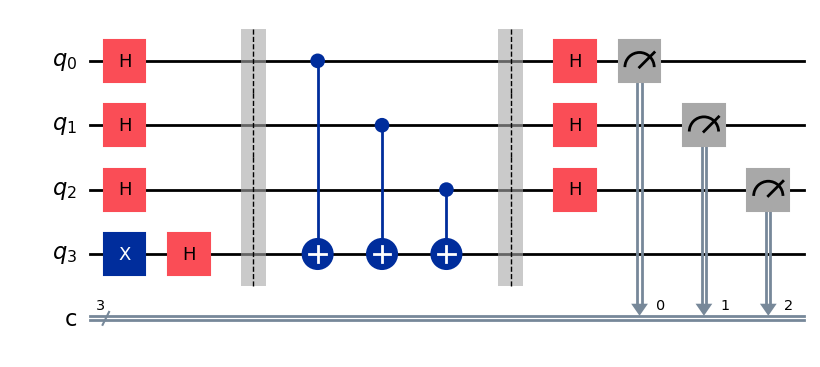

In [47]:
# Desenhar o circuito completo
print("Circuito quântico do Algoritmo de Deutsch-Jozsa:")
display(circ2.draw('mpl'))


### 📊 Comparação: Clássico vs Quântico

| Característica | Versão Clássica (acima) | Versão Quântica (abaixo) |
|----------------|-------------------------|--------------------------|
| **Consultas necessárias** | Até $2^{n-1} + 1$ (5 para n=3) | **1 única consulta** |
| **Para n=3 bits** | Até 5 verificações | 1 verificação |
| **Para n=20 bits** | Até 524,289 verificações | 1 verificação |
| **Complexidade** | $O(2^n)$ exponencial | $O(1)$ constante! |
| **Certeza do resultado** | 100% após pior caso | 100% com 1 consulta |

### 🎯 Estratégia Pedagógica

Vamos construir o algoritmo **passo a passo**, executando e visualizando cada etapa. Isso ajuda a entender:
1. Como a superposição permite testar todas as entradas simultaneamente
2. Como o phase kickback codifica a informação nas fases
3. Como a interferência extrai a resposta final

Vamos começar!

---

#### O circuito detalhado Deutsch-Jozsa em Python

Primeiro, importamos as bibliotecas necessárias:

In [48]:

# ============================================
# DEFINIÇÃO DOS ORÁCULOS
# ============================================

def oraculo_balanceado(n_qubits):
    """
    Cria um circuito que representa uma função BALANCEADA.
    
    Esta função retorna 0 para metade das entradas e 1 para a outra metade.
    Implementação: CNOTs de todos os qubits de entrada para o qubit de saída.
    
    Equivalente quântico de: tabela_oculta = [0]*metade + [1]*metade (embaralhado)
    """
    qc = QuantumCircuit(n_qubits + 1)
    for qubit in range(n_qubits):
        qc.cx(qubit, n_qubits) # CNOT de todos inputs para o alvo
    return qc

def oraculo_constante(n_qubits):
    """
    Cria um circuito que representa uma função CONSTANTE.
    
    Esta função retorna sempre 0 ou sempre 1 (independente da entrada).
    
    Implementação:
    - Retorna sempre 0: não faz nada (circuito identidade)
    - Retorna sempre 1: aplica X no qubit de saída
    
    Equivalente quântico de: tabela_oculta = [0] * total_inputs
                          ou: tabela_oculta = [1] * total_inputs
    """
    qc = QuantumCircuit(n_qubits + 1)
    # Não adicionamos portas, então a saída é constante 0
    # Para constante 1, descomente a linha abaixo:
    # qc.x(n_qubits)
    return qc



In [49]:

# ============================================
# CONSTRUÇÃO DO ALGORITMO PASSO A PASSO
# ============================================

n = 3  # Número de bits de entrada
qc = QuantumCircuit(n + 1, n)

print("="*70)
print("🎯 ALGORITMO DE DEUTSCH-JOZSA - CONSTRUÇÃO PASSO A PASSO")
print("="*70)
print(f"Testando com {n} qubits de entrada")
print("="*70)

# ─────────────────────────────────────────────
# PASSO 1: Inicialização
# ─────────────────────────────────────────────
print("\n📍 PASSO 1: Inicialização")
print("   Colocando qubits de entrada em superposição |+⟩")
print("   Preparando qubit auxiliar no estado |−⟩ para phase kickback")

# Inputs (0 a n-1) em Superposição |+>
qc.h(range(n))

# Alvo (último qubit) no estado |-> para gerar o KICKBACK
qc.x(n)
qc.h(n)

qc.barrier()

print("   ✅ Preparação concluída!")


🎯 ALGORITMO DE DEUTSCH-JOZSA - CONSTRUÇÃO PASSO A PASSO
Testando com 3 qubits de entrada

📍 PASSO 1: Inicialização
   Colocando qubits de entrada em superposição |+⟩
   Preparando qubit auxiliar no estado |−⟩ para phase kickback
   ✅ Preparação concluída!


Estado inicial - Superposição uniforme de todos os 8 estados:


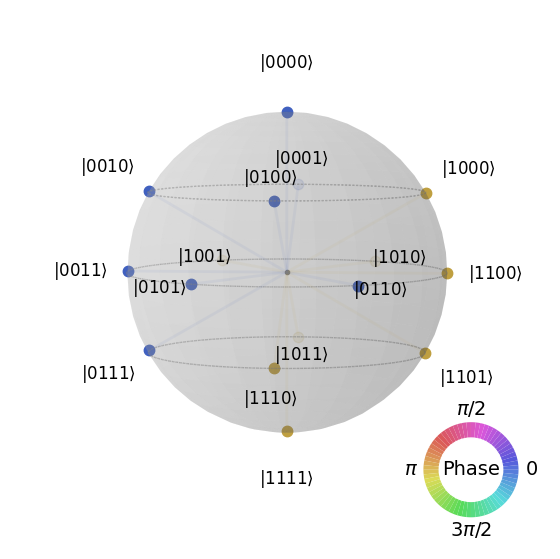

In [50]:
# Visualizar estado inicial
estado_inicial_dj = Statevector(qc)
print("Estado inicial - Superposição uniforme de todos os 8 estados:")
display(plot_state_qsphere(estado_inicial_dj))

#### Demonstração Matemática: Estado Inicial do Algoritmo

Estado inicial com $n=3$ qubits de entrada e 1 qubit auxiliar:

$$|\psi_0\rangle = |000\rangle \otimes |1\rangle$$

Aplicando H em todos os 4 qubits:

$$|\psi_1\rangle = H^{\otimes 3}|000\rangle \otimes H|1\rangle$$

$$= \left(\frac{1}{\sqrt{2^3}} \sum_{x=0}^{7} |x\rangle\right) \otimes |-\rangle$$

$$= \frac{1}{2\sqrt{2}} (|000\rangle + |001\rangle + |010\rangle + ... + |111\rangle) \otimes \frac{|0\rangle - |1\rangle}{\sqrt{2}}$$

Cada um dos 8 estados possíveis tem amplitude $\frac{1}{2\sqrt{2}}$, criando uma **superposição uniforme**.

In [51]:

# ─────────────────────────────────────────────
# PASSO 2: Aplicação do Oráculo
# ─────────────────────────────────────────────
print("\n📍 PASSO 2: Aplicação do Oráculo")
print("   Vamos usar um oráculo BALANCEADO")
print("   Aqui acontece a 'mágica': testamos TODAS as entradas simultaneamente!")

# Vamos usar o balanceado. O algoritmo deve descobrir isso.
oraculo = oraculo_balanceado(n)
# Adicionamos o oráculo ao nosso circuito principal
qc = qc.compose(oraculo)

qc.barrier()

print("   ✅ Oráculo aplicado! Informação codificada nas fases.")



📍 PASSO 2: Aplicação do Oráculo
   Vamos usar um oráculo BALANCEADO
   Aqui acontece a 'mágica': testamos TODAS as entradas simultaneamente!
   ✅ Oráculo aplicado! Informação codificada nas fases.


Estado após oráculo - Note as mudanças de fase:


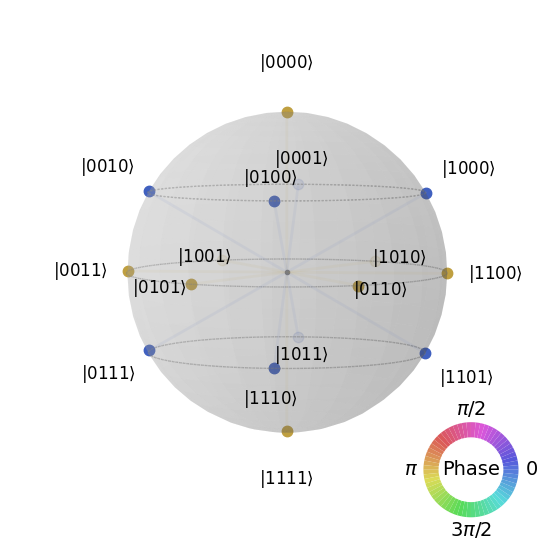

In [52]:
# Visualizar estado após oráculo
estado_apos_oraculo_dj = Statevector(qc)
print("Estado após oráculo - Note as mudanças de fase:")
display(plot_state_qsphere(estado_apos_oraculo_dj))

#### Demonstração Matemática: Ação do Oráculo Balanceado

O oráculo balanceado implementa CNOTs de cada qubit de entrada para o qubit auxiliar:

$$U_f = \text{CNOT}_{0 \to 3} \cdot \text{CNOT}_{1 \to 3} \cdot \text{CNOT}_{2 \to 3}$$

Para cada estado base $|x\rangle = |x_2x_1x_0\rangle$, o oráculo calcula:

$$f(x) = x_0 \oplus x_1 \oplus x_2$$

Esta é uma função **balanceada** porque:
- $f(000) = 0$, $f(001) = 1$, $f(010) = 1$, $f(011) = 0$
- $f(100) = 1$, $f(101) = 0$, $f(110) = 0$, $f(111) = 1$

Exatamente 4 valores retornam 0 e 4 retornam 1 (balanceado).

Aplicando ao estado com qubit auxiliar em $|-\rangle$:

$$|\psi_2\rangle = \frac{1}{2\sqrt{2}} \sum_{x=0}^{7} (-1)^{f(x)} |x\rangle \otimes |-\rangle$$

Os estados agora têm **fases diferentes** baseadas em $f(x)$!

In [53]:

# ─────────────────────────────────────────────
# PASSO 3: Interferência Final
# ─────────────────────────────────────────────
print("\n📍 PASSO 3: Interferência")
print("   Aplicando Hadamard novamente para converter FASE em AMPLITUDE")

# Aplicamos H em todos os inputs novamente.
# Isso transforma o padrão de fase (criado pelo kickback) em resposta binária.
qc.h(range(n))

print("   ✅ Interferência concluída! Pronto para medir.")



📍 PASSO 3: Interferência
   Aplicando Hadamard novamente para converter FASE em AMPLITUDE
   ✅ Interferência concluída! Pronto para medir.


Estado antes da medição - Após interferência:


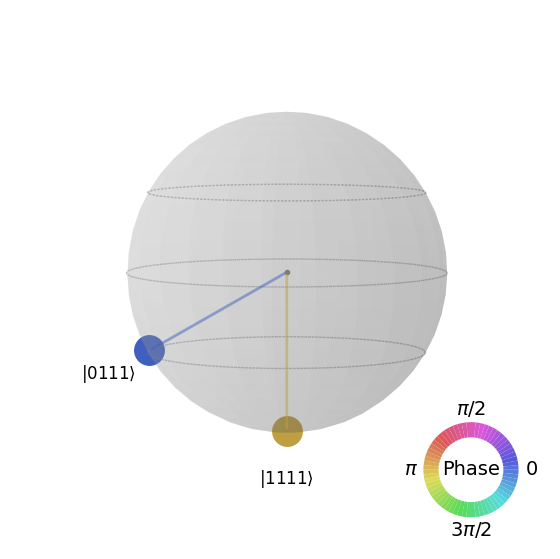

In [54]:
# Visualizar estado antes da medição
estado_antes_medicao = Statevector(qc)
print("Estado antes da medição - Após interferência:")
display(plot_state_qsphere(estado_antes_medicao))

#### Demonstração Matemática: Interferência e Resultado Final

Aplicando H nos 3 qubits de entrada:

$$|\psi_3\rangle = \frac{1}{8} \sum_{x=0}^{7} \sum_{z=0}^{7} (-1)^{f(x) + x \cdot z} |z\rangle$$

Para $z = 000$:

$$\text{amplitude}(|000\rangle) = \frac{1}{8} \sum_{x=0}^{7} (-1)^{f(x)}$$

Como $f$ é balanceada (4 valores 0, 4 valores 1):

$$= \frac{1}{8}[4 \times (+1) + 4 \times (-1)] = \frac{1}{8}[4 - 4] = 0$$

**Interferência destrutiva completa em $|000\rangle$!**

Para $z = 111$:

$$\text{amplitude}(|111\rangle) = \frac{1}{8} \sum_{x=0}^{7} (-1)^{f(x) + x \cdot 111}$$

Pode-se mostrar que esta amplitude é **não-zero** para funções balanceadas.

**Conclusão:** Nunca medimos $|000\rangle$ → função é balanceada!

In [55]:

# ─────────────────────────────────────────────
# PASSO 4: Medição
# ─────────────────────────────────────────────
print("\n📍 PASSO 4: Medição")
print("   Medindo apenas os qubits de entrada (não precisamos medir o auxiliar)")

# Medimos APENAS os qubits de entrada (0 a n-1)
qc.measure(range(n), range(n))

print("   ✅ Circuito completo! Pronto para executar.")
print("="*70)



📍 PASSO 4: Medição
   Medindo apenas os qubits de entrada (não precisamos medir o auxiliar)
   ✅ Circuito completo! Pronto para executar.



🚀 EXECUTANDO O ALGORITMO...

📊 Resultado da medição (1000 execuções): {'111': 1000}

📋 INTERPRETAÇÃO DO RESULTADO
   ✅ Nunca medimos '000' → A função é BALANCEADA
   (Interferência destrutiva em |000⟩)

💡 VANTAGEM QUÂNTICA:
   • Versão Clássica: até 5 consultas necessárias
   • Versão Quântica: 1 consulta (sempre!)
   • Speedup: 5x mais rápido!


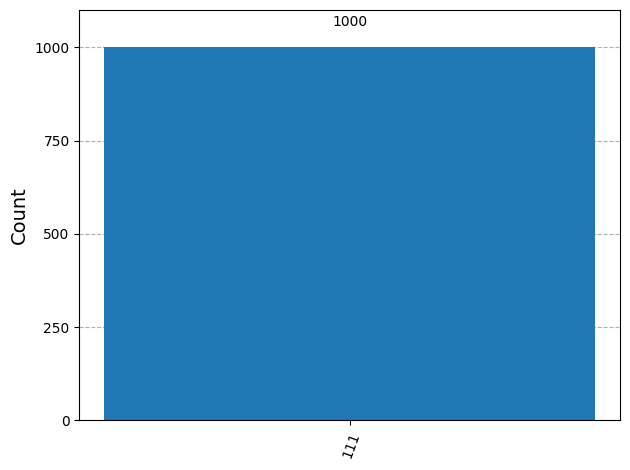

In [56]:

# ─────────────────────────────────────────────
# PASSO 5: Execução e Interpretação
# ─────────────────────────────────────────────
print("\n🚀 EXECUTANDO O ALGORITMO...\n")

# Executar no simulador
simulador = AerSimulator()
job = simulador.run(transpile(qc, simulador), shots=1000)
resultado = job.result().get_counts()

print(f"📊 Resultado da medição (1000 execuções): {resultado}")
print("\n" + "="*70)
print("📋 INTERPRETAÇÃO DO RESULTADO")
print("="*70)

if '000' in resultado:
    print("   ❌ Medimos '000' → A função é CONSTANTE")
    print("   (Interferência construtiva em |000⟩)")
else:
    print("   ✅ Nunca medimos '000' → A função é BALANCEADA")
    print("   (Interferência destrutiva em |000⟩)")

print("\n💡 VANTAGEM QUÂNTICA:")
print(f"   • Versão Clássica: até {(2**(n-1)) + 1} consultas necessárias")
print(f"   • Versão Quântica: 1 consulta (sempre!)")
print(f"   • Speedup: {(2**(n-1)) + 1}x mais rápido!")
print("="*70)
    
# Visualizar histograma
plot_histogram(resultado)


---

## 🔍 Entendendo o Resultado em Profundidade

### 📊 Interpretação dos Resultados

Após executar o algoritmo, você viu um histograma com os resultados das medições. A interpretação é simples:

**Regra de Decisão:**
- ✅ **Se medir `000`:** A função é **CONSTANTE** (sempre 0 ou sempre 1)
- ✅ **Se medir qualquer outra coisa** (ex: `111`, `101`, etc.): A função é **BALANCEADA**

No nosso caso, usamos `oraculo_balanceado(3)`, então **nunca** devemos medir `000`!

### 🔬 Por Que Isso Funciona?

A "mágica" está em três ingredientes trabalhando juntos:

**1. Phase Kickback**
- O qubit auxiliar em $|-\rangle$ causa kickback quando o oráculo aplica X
- Estados onde $f(x) = 1$ ganham fase negativa: $(-1)^{f(x)}$
- A informação sobre a função fica "codificada" nas fases!

**2. Superposição Inicial**
- Todos os $2^n$ estados possíveis são processados **simultaneamente**
- Uma única aplicação do oráculo "consulta" todas as entradas de uma vez
- Paralelismo quântico em ação!

**3. Interferência Final**
- Os Hadamards finais convertem diferenças de FASE em diferenças de AMPLITUDE
- Para funções constantes: todas as fases são iguais → interferência construtiva em $|000\rangle$
- Para funções balanceadas: metade tem fase +, metade tem fase − → interferência **destrutiva** em $|000\rangle$

### 🧮 Demonstração Matemática Simplificada

**Função Constante:** $f(x) = c$ para todo $x$

$$\text{Amplitude}(|000\rangle) = \frac{1}{2^n}\sum_{x=0}^{2^n-1} (-1)^c = \frac{2^n \cdot (-1)^c}{2^n} = \pm 1$$

**Probabilidade = 100%** de medir $|000\rangle$ ✅

**Função Balanceada:** Metade dos $x$ têm $f(x)=0$, metade têm $f(x)=1$

$$\text{Amplitude}(|000\rangle) = \frac{1}{2^n}\left[\frac{2^n}{2} \cdot (+1) + \frac{2^n}{2} \cdot (-1)\right] = \frac{1}{2^n}\left[\frac{2^n}{2} - \frac{2^n}{2}\right] = 0$$

**Probabilidade = 0%** de medir $|000\rangle$ (interferência destrutiva perfeita!) ❌

### 💻 Comparação Final: Clássico vs Quântico

| Aspecto | Computador Clássico | Computador Quântico |
|---------|---------------------|---------------------|
| **Consultas ao oráculo** | Até $2^{n-1} + 1$ | **1 única consulta** |
| **Para $n=3$ bits** | Até 5 consultas | 1 consulta |
| **Para $n=10$ bits** | Até 513 consultas | 1 consulta |
| **Para $n=100$ bits** | Até $~6.3 \times 10^{29}$ consultas | **1 consulta** |
| **Escalabilidade** | Cresce exponencialmente | **Constante!** |

**Vantagem:** Exponencial em termos de consultas ao oráculo! 🚀

### 🎯 O Insight Principal

O algoritmo **NÃO** testa todas as entradas individualmente. Em vez disso:

1. Cria superposição de **todas as entradas simultaneamente**
2. Consulta o oráculo **uma única vez** nesta superposição
3. Extrai informação **global** (propriedade de toda a função) através de **interferência**

Isso é fundamentalmente diferente de como computadores clássicos funcionam - e é a essência da **vantagem quântica**!

### ⚠️ Limitações Importantes

- O algoritmo só funciona para este tipo específico de problema (constante vs. balanceado)
- Não diz QUAL é o valor da função, apenas sua categoria
- Requer um oráculo quântico (reversível)
- É um problema "artificial" - mas demonstra princípios usados em algoritmos práticos

### 🔬 Experimento: Teste Você Mesmo!

Experimente modificar o código acima para usar `oraculo_constante(3)` em vez de `oraculo_balanceado(3)`:

```python
# Na célula onde definimos o oráculo, mude esta linha:
oraculo = oraculo_constante(n)  # Em vez de oraculo_balanceado(n)
```

Você deverá ver:
- Resultado: `{'000': 1000}` (100% das vezes)
- Confirmando que a função é constante!

### 🧪 Desafio Adicional

Tente aumentar `n` para 10 ou 15 bits e compare mentalmente:
- **Clássico:** Precisaria de até 513 ou 16,385 consultas
- **Quântico:** Sempre 1 consulta! 🚀

---


---

## 📚 Resumo e Conceitos Aprendidos

Neste notebook, você dominou os fundamentos dos algoritmos quânticos mais poderosos! Vamos recapitular:

### 🎯 Conceitos Fundamentais

#### 1. **Phase Kickback (Coice de Fase)**
- **O que é:** Fenômeno onde o qubit ALVO afeta o qubit CONTROLE através de mudanças de fase
- **Como funciona:** Preparando o alvo em um autoestado (como $|-\rangle$), a operação CNOT "devolve" fase para o controle
- **Analogia:** Como o coice de uma arma - a ação no alvo gera reação no controle
- **Importância:** Mecanismo fundamental que permite algoritmos quânticos eficientes

#### 2. **Estados Especiais**
- **$|+\rangle = H|0\rangle = \frac{|0\rangle + |1\rangle}{\sqrt{2}}$** - Superposição com fase positiva
- **$|-\rangle = H|1\rangle = \frac{|0\rangle - |1\rangle}{\sqrt{2}}$** - Superposição com fase negativa
- **Propriedade chave:** $X|-\rangle = -|-\rangle$ (autoestado de X)

#### 3. **Algoritmo de Deutsch-Jozsa**
- **Problema:** Determinar se uma função é constante ou balanceada
- **Solução Clássica:** Até $2^{n-1} + 1$ consultas necessárias
- **Solução Quântica:** **UMA ÚNICA CONSULTA!** (vantagem exponencial)
- **Resultado:** 
  - Medir $|000...0\rangle$ → função é CONSTANTE
  - Medir qualquer outro valor → função é BALANCEADA

### 🔬 Técnicas Aprendidas

1. **Preparação de Estados**
   - Criar superposições uniformes com Hadamard
   - Preparar estados especiais ($|-\rangle$) para kickback

2. **Oráculos Quânticos**
   - Implementar funções como operações unitárias
   - Marcar estados com fases sem destruir superposição

3. **Interferência Quântica**
   - Usar Hadamards finais para converter fase em amplitude
   - Causar interferência destrutiva/construtiva para extrair informação

4. **Visualizações Avançadas**
   - Esfera de Bloch para qubits individuais
   - Q-Sphere para sistemas multi-qubit
   - Acompanhar mudanças de fase através de cores

### 🚀 Por Que Isso É Importante?

O Phase Kickback é a "mágica" por trás de:

| Algoritmo | Aplicação | Vantagem Quântica |
|-----------|-----------|-------------------|
| **Deutsch-Jozsa** | Determinar propriedade global de função | Exponencial em consultas |
| **Grover** | Busca em banco de dados não-ordenado | Quadrática em tempo |
| **Shor** | Fatoração de números inteiros | Exponencial em tempo |
| **QPE** | Estimação de fase quântica | Base para química quântica |

### 💡 Insights Principais

1. **Fase é Informação:** Mudanças de fase contêm informação que pode ser extraída via interferência
2. **Paralelismo Quântico:** Superposição permite processar múltiplas entradas simultaneamente
3. **Consulta Única:** Com preparação adequada, uma consulta quântica equivale a múltiplas clássicas
4. **Interferência = Computação:** A matemática acontece na interferência de amplitudes

### 🎓 Próximos Passos

Agora que você domina estes conceitos, está pronto para:

1. **Algoritmo de Grover** - Busca em espaço não-estruturado
   - Usa amplitude amplification (generalização de Deutsch-Jozsa)
   - Speedup quadrático: $O(\sqrt{N})$ vs. $O(N)$ clássico

2. **Algoritmo de Shor** - Fatoração de inteiros
   - Usa Quantum Phase Estimation (QPE)
   - Ameaça à criptografia RSA moderna

3. **VQE e QAOA** - Otimização variacional
   - Aplicações em química quântica e otimização combinatória
   - Algoritmos híbridos quântico-clássicos

4. **Simulação Quântica** - Modelar sistemas quânticos complexos
   - Química computacional, ciência de materiais
   - Algoritmos de Hamiltonian simulation

### ✨ Reflexão Final

Você acabou de implementar um algoritmo que demonstra **supremacia quântica** em termos de complexidade de consulta! O Deutsch-Jozsa prova que computadores quânticos podem resolver certos problemas fundamentalmente mais rápido que computadores clássicos.

A jornada de aprendizado em computação quântica é como subir uma escada:
- ✅ **Superposição** - você aprendeu em [01-intro.ipynb](01-intro.ipynb)
- ✅ **Emaranhamento** - você aprendeu em [02-teletransport.ipynb](02-teletransport.ipynb)  
- ✅ **Interferência** - você aprendeu em [04-Hadamard-experiment.ipynb](04-Hadamard-experiment.ipynb)
- ✅ **Phase Kickback** - você dominou neste notebook!
- 🚀 **Algoritmos Avançados** - você está pronto!

**Parabéns por chegar até aqui! Você agora entende os mecanismos que fazem a computação quântica ser poderosa.** 🎉

---

### 📖 Referências Adicionais

- **Deutsch-Jozsa Algorithm:** Deutsch, D., & Jozsa, R. (1992). "Rapid solution of problems by quantum computation." *Proceedings of the Royal Society of London A*, 439(1907), 553-558.
- **Nielsen & Chuang:** Chapter 1.4 (Deutsch-Jozsa), Chapter 6 (Quantum Algorithms)
- **Qiskit Textbook:** [Deutsch-Jozsa Algorithm](https://qiskit.org/textbook/ch-algorithms/deutsch-jozsa.html)

---